# Random Forest

In [1]:
import pandas as pd

people = pd.read_csv('ingresos.txt')
people

,edad,estudio,genero,tipo_trabajo,horas,ingreso
0,27,9,0,0,40,0
1,30,9,0,0,40,0
2,34,8,0,0,40,0
3,26,13,0,0,50,0
4,23,4,1,0,25,0
...,...,...,...,...,...,...
95,32,13,1,0,55,1
96,20,10,0,0,25,0
97,46,3,0,0,40,0
98,37,9,1,0,45,0


In [2]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   edad          100 non-null    int64
 1   estudio       100 non-null    int64
 2   genero        100 non-null    int64
 3   tipo_trabajo  100 non-null    int64
 4   horas         100 non-null    int64
 5   ingreso       100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


### Muestreo con reemplazo
#### >>> max_samples <<<

In [6]:
# to divide the data in samples:
print(people.sample(frac=2/3, replace=True))
print(people.sample(frac=2/3, replace=True))
print(people.sample(frac=2/3, replace=True))
print(people.sample(frac=2/3, replace=True))
print(people.sample(frac=2/3, replace=True))

# With this technique, we reduce the variability simply by using random samples


    edad  estudio  genero  tipo_trabajo  horas  ingreso
76    27       14       0             0     40        0
56    34       13       0             0     39        0
73    50       14       1             1     45        0
46    44       10       0             0     32        0
15    63       13       1             1     40        0
..   ...      ...     ...           ...    ...      ...
28    30        9       1             1     60        0
93    47       15       1             0     40        1
61    43       10       0             0     35        0
76    27       14       0             0     40        0
46    44       10       0             0     32        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
99    47        9       1             0     12        0
30    20        9       1             0     40        0
73    50       14       1             1     45        0
72    63       14       1             1     40        1
21    25       10       1

### Randomness (aletoriedad)
#### Select some features to create the divisions
##### >>> max_features = sqrt(num_features)

In [13]:
from random import sample

people.columns[:] # ['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas', 'ingreso'], income = output
print(people.columns[:-1], '\n')
print(sample(set(people.columns[:-1]), 3))  # take 3 random columns, we use this to create several trees, see GINI to choose the best samples
# the best practice to choose the number of variables o columns are the sqrt(num_features) = sqrt(5) ~~ 2.x ~~ 3 



Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['tipo_trabajo', 'edad', 'estudio']


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8424\1708403087.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(people.columns[:-1]), 3))


### Creating the random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

my_forest = RandomForestClassifier(n_estimators=100, # 100 is a good estimator
                                   criterion='gini',
                                   max_features='sqrt', 
                                   bootstrap=True,
                                   max_samples=2/3,
                                   oob_score = True)  # out of bag, 1/3 que quedo fuera.

my_forest.fit(people[people.columns[:-1]].values, people['ingreso'].values)  # values to transfor pandas to numpy

print( my_forest.predict([[50, 16, 1, 1, 40]]) )
print(my_forest.score(people[people.columns[:-1]].values, people['ingreso'].values))  # Accuracy
print(my_forest.oob_score_)


[1]
0.99
0.77


### Data visualization of the random forest

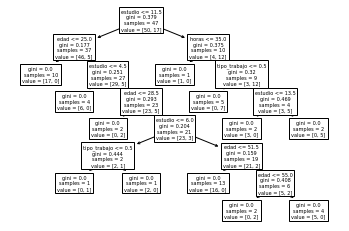

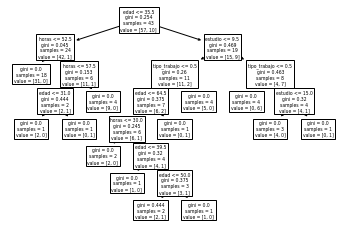

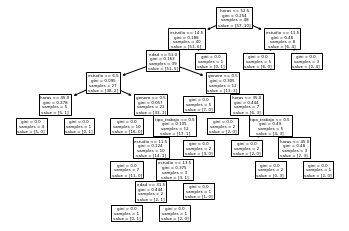

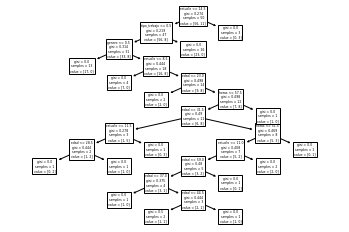

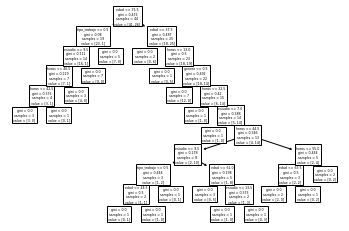

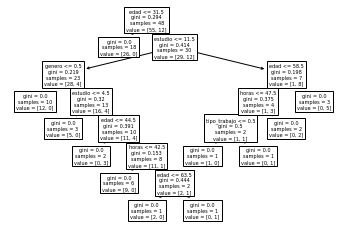

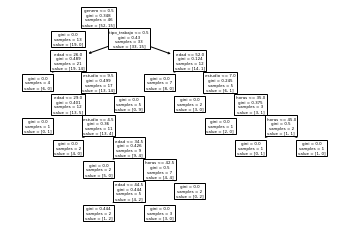

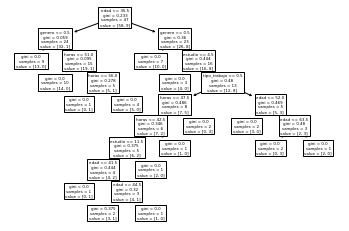

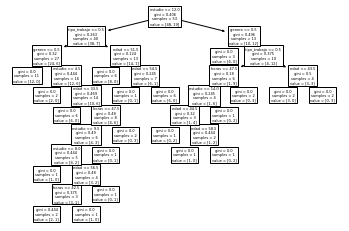

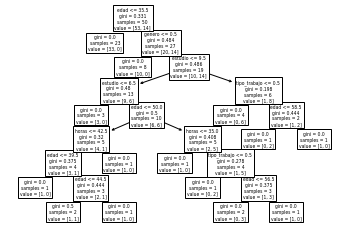

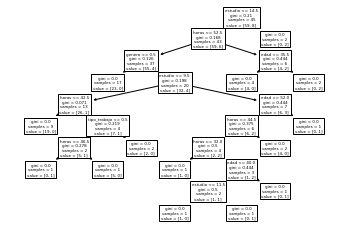

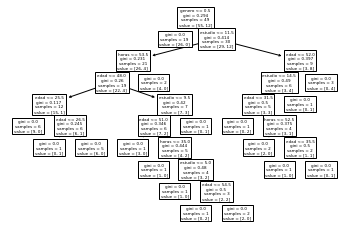

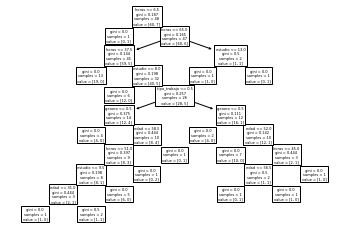

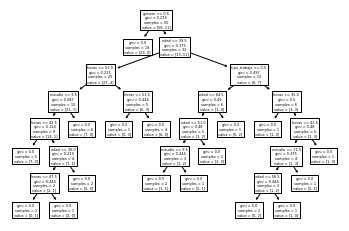

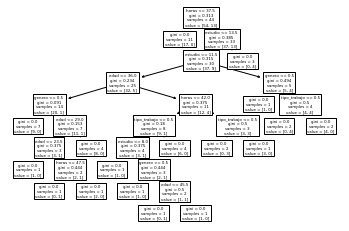

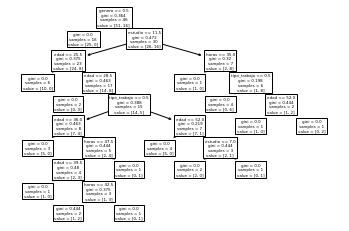

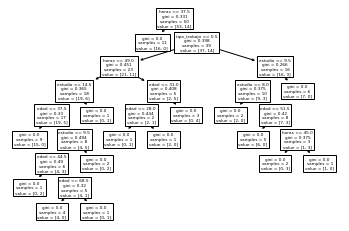

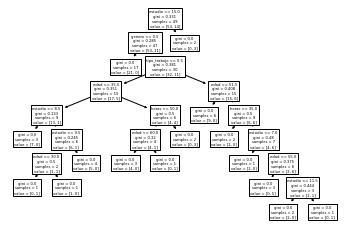

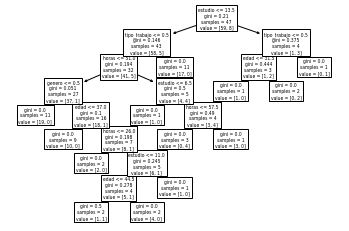

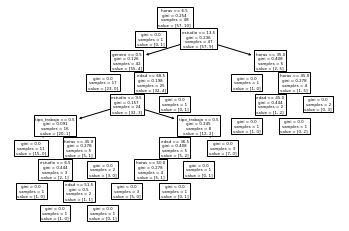

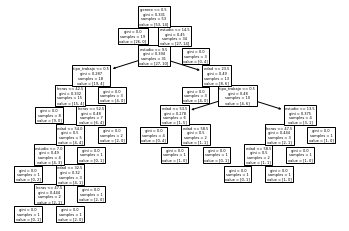

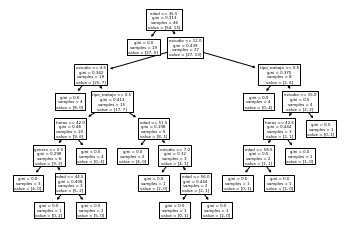

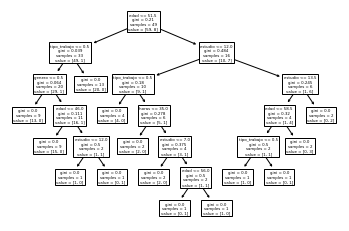

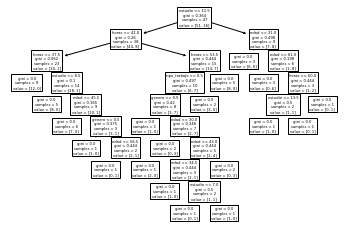

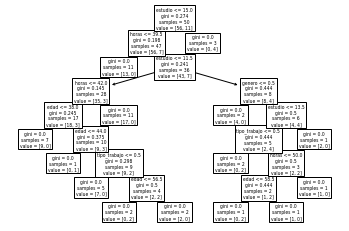

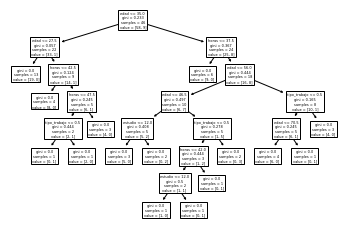

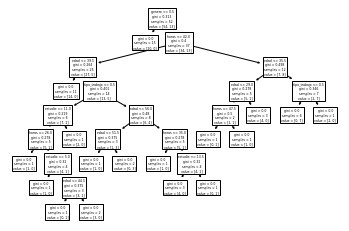

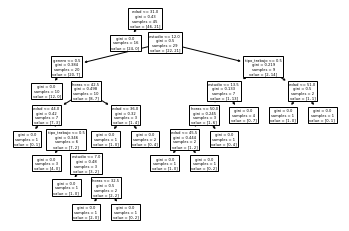

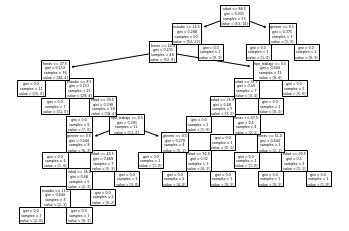

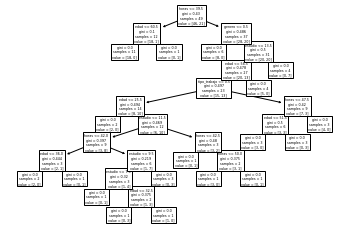

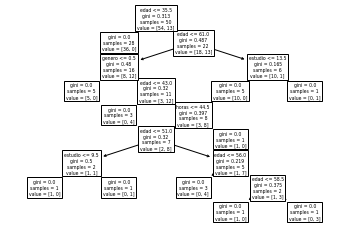

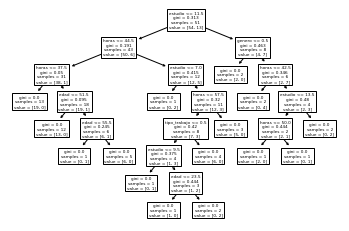

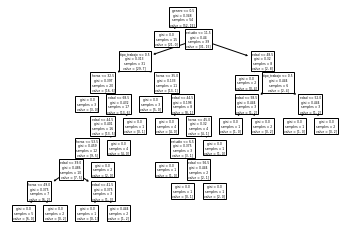

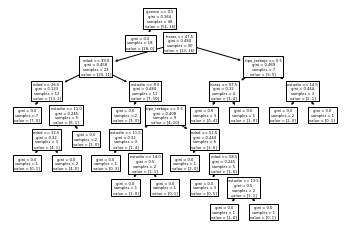

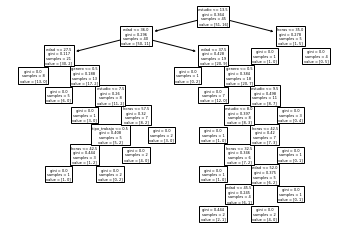

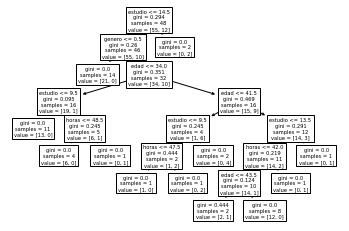

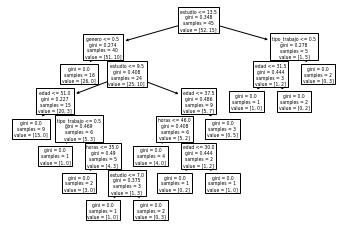

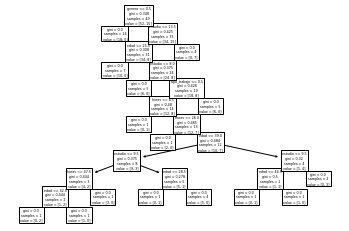

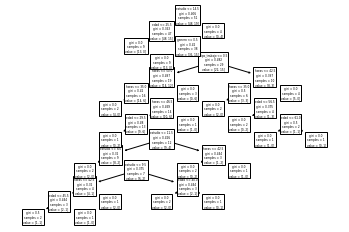

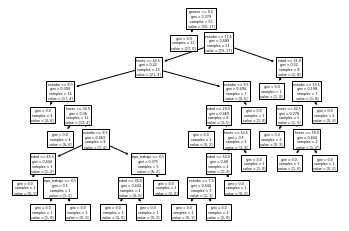

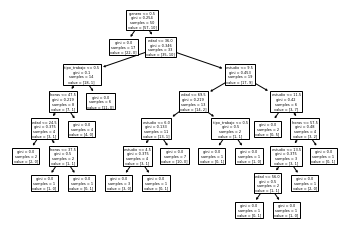

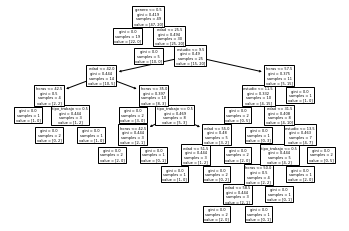

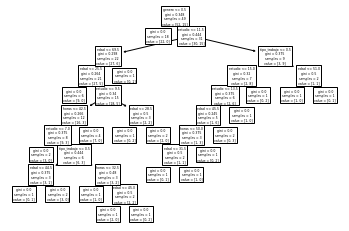

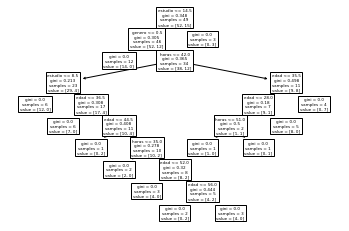

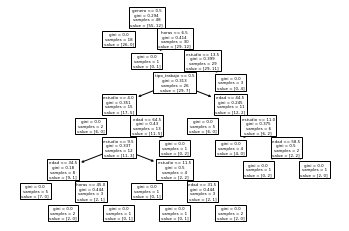

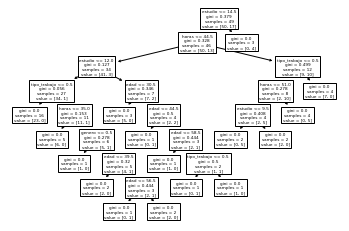

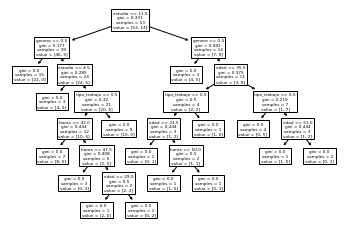

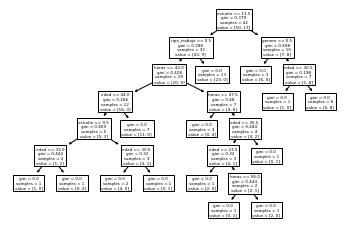

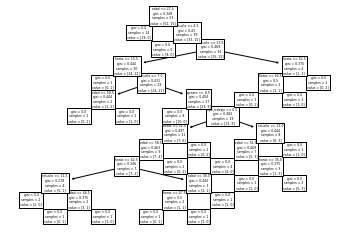

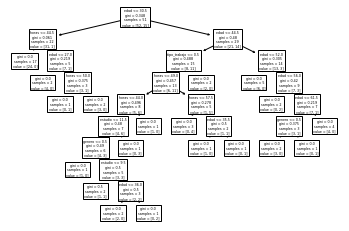

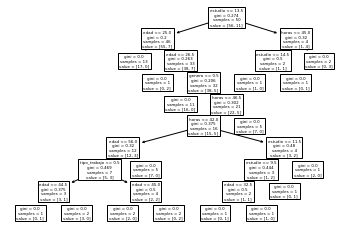

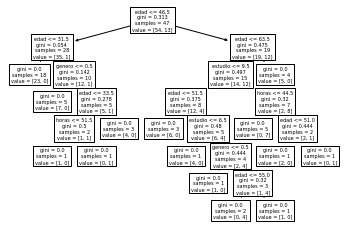

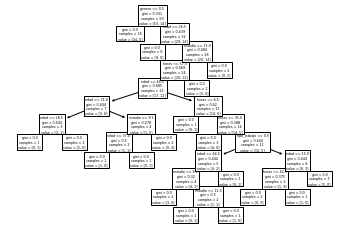

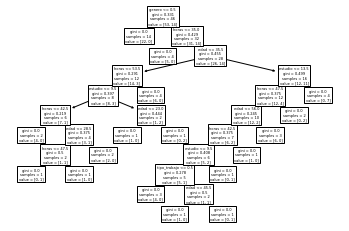

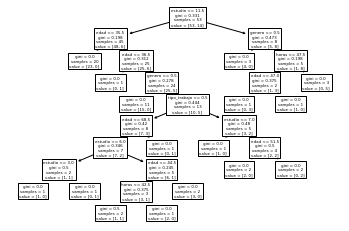

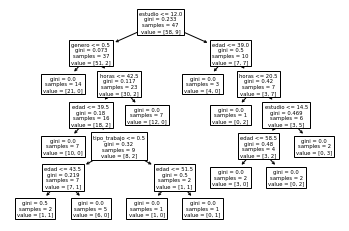

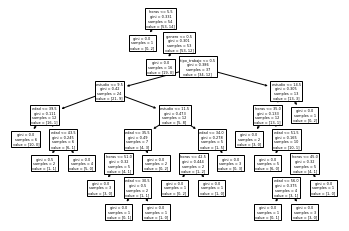

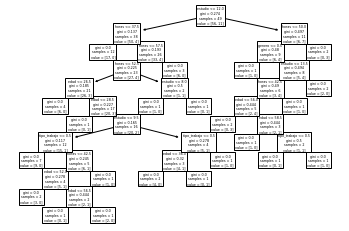

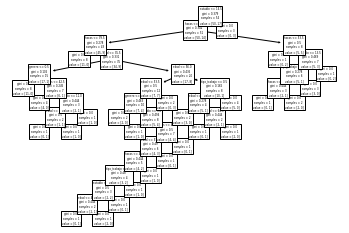

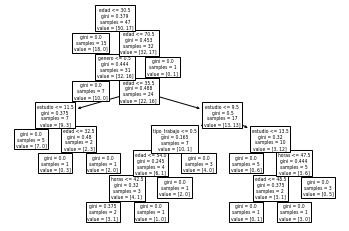

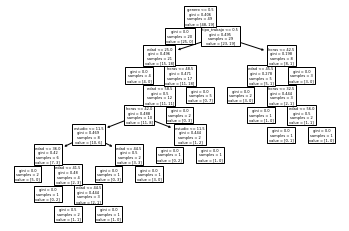

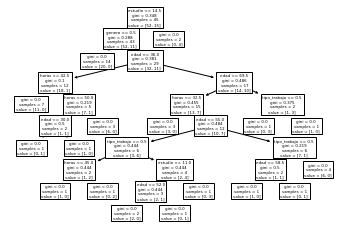

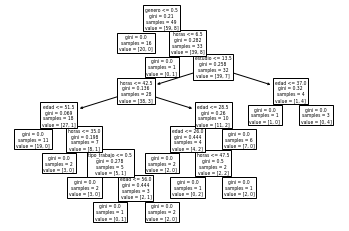

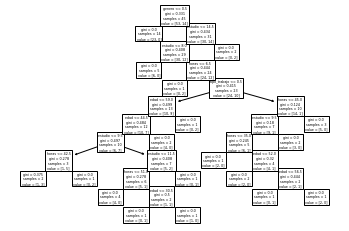

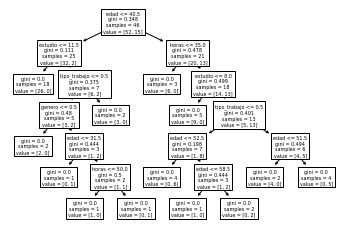

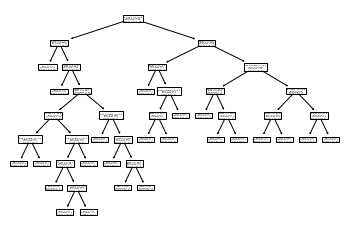

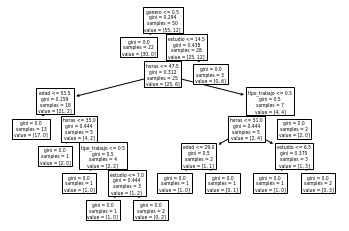

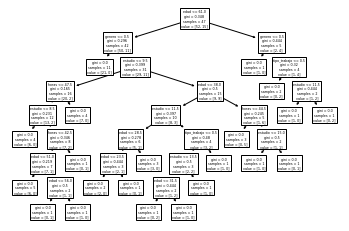

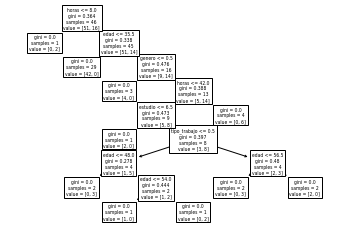

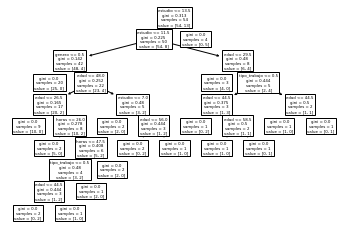

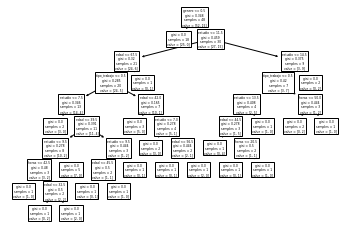

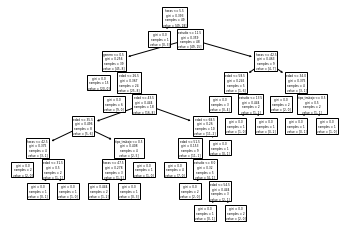

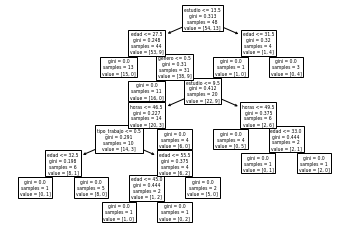

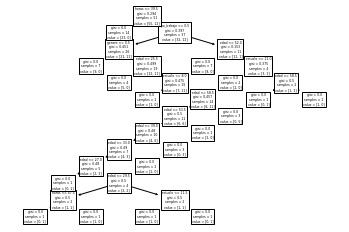

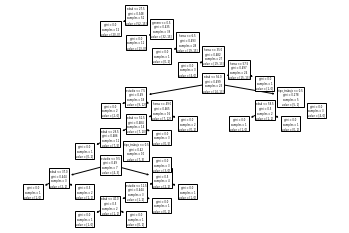

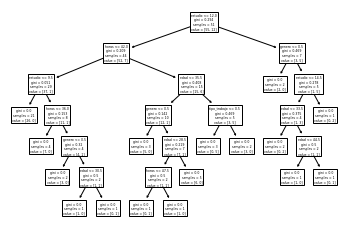

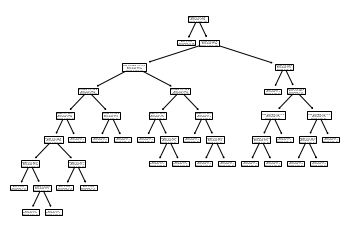

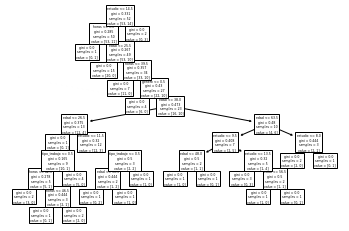

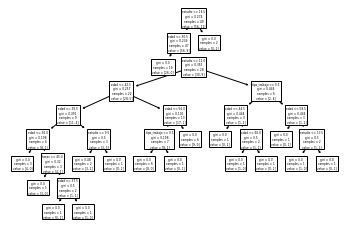

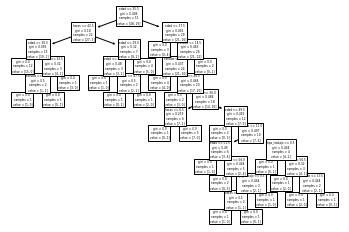

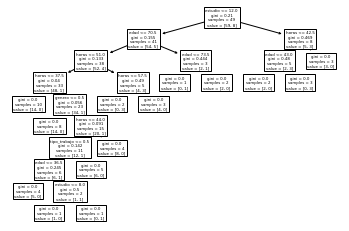

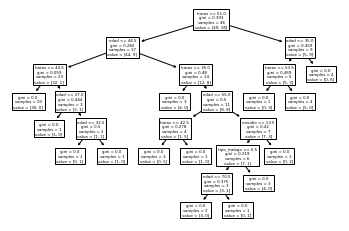

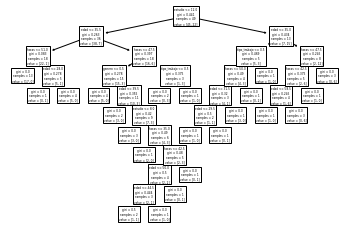

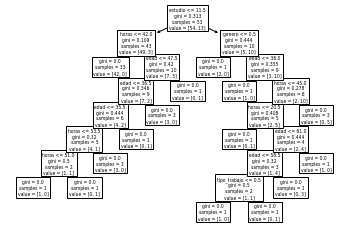

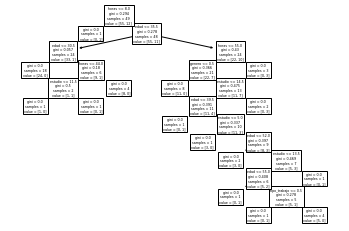

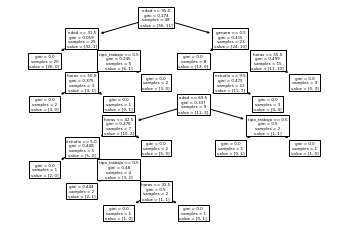

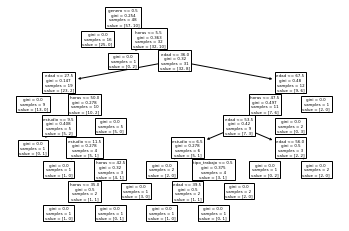

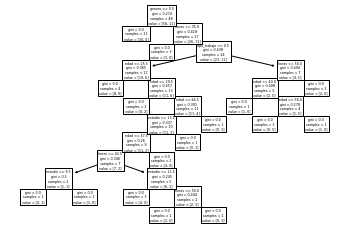

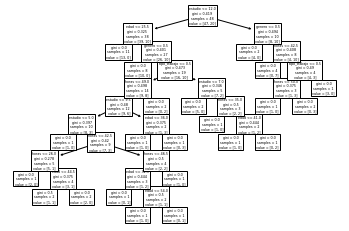

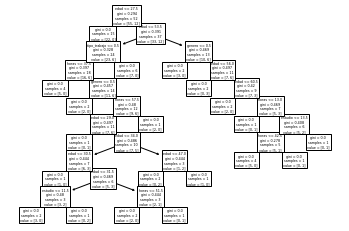

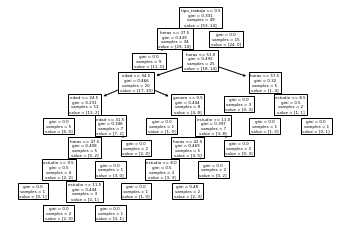

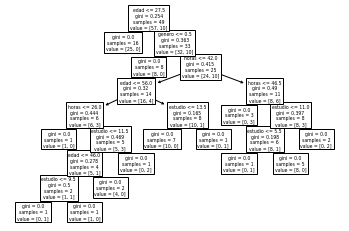

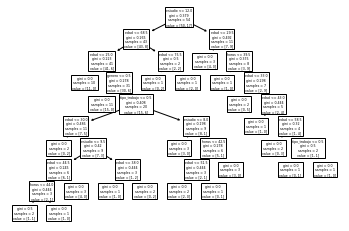

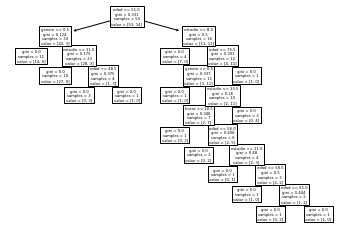

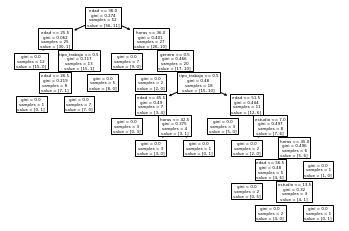

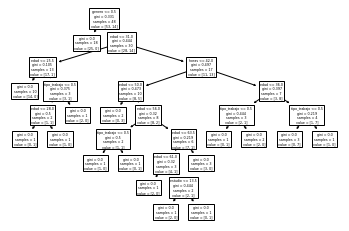

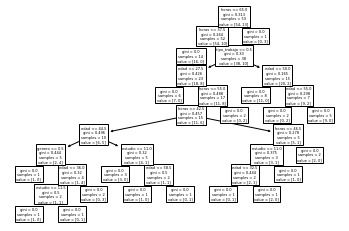

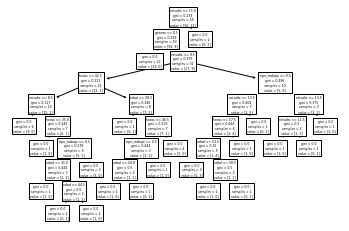

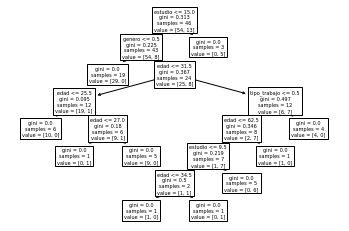

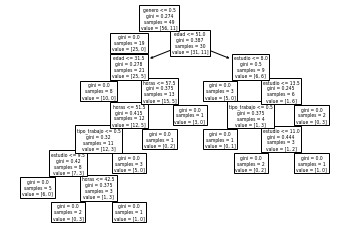

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

for my_tree in my_forest.estimators_:
    tree.plot_tree(my_tree, feature_names=people.columns[:-1])
    plt.show()
    

### Ref: Breiman "Random Forest", Machine Learning, 45(1), 5-32, 2001